# Rota de colisão aérea


* Contextualização: Dentro do contexto de controle de tráfego aéreo, um problema extremamente recorrente é o controle da distância entre aviões e também o horário de vôo entre eles. Isso deve-se ao fato que quanto mais próximo um veículo aéreo se encontra do outro, maior a chance de colisão.

* Problema: Dentro de um dataset com latitude e longitude de alguns pontos em cado estado presente no território dos Estados Unidos com tráfego aério constante, o objetivo do presente trabalho é encontrar os pares ordenados das regiões mais próximos em um plano cartesiano. Ou seja, a região mais propícia para ocorrência de algum acidente aério no que tange colisões.


* Algoritmo: Para ilustração desse contexto, será utilizado um algoritmo baseado em dividir e conquistar com tempo de complexidade O(n(Logn)²)

### Instalação de dependências

In [ ]:
pip install geopandas

     |████████████████████████████████| 972kB 8.8MB/s 
     |████████████████████████████████| 14.8MB 319kB/s 
     |████████████████████████████████| 6.5MB 44.1MB/s 


### Carregamento do dataset de latitude e longitude de cidades

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Datasets/statelatlong.csv')

df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,State,Latitude,Longitude,City
0,AL,32.601011,-86.680736,Alabama
1,AK,61.302501,-158.775020,Alaska
2,AZ,34.168219,-111.930907,Arizona
3,AR,34.751928,-92.131378,Arkansas
4,CA,37.271875,-119.270415,California
5,CO,38.997934,-105.550567,Colorado
6,CT,41.518784,-72.757507,Connecticut
7,DE,39.145251,-75.418921,Delaware
8,DC,38.899349,-77.014567,District of Columbia
9,FL,27.975728,-83.833017,Florida


### Plotagem de gráfico com posição das cidades nos EUA

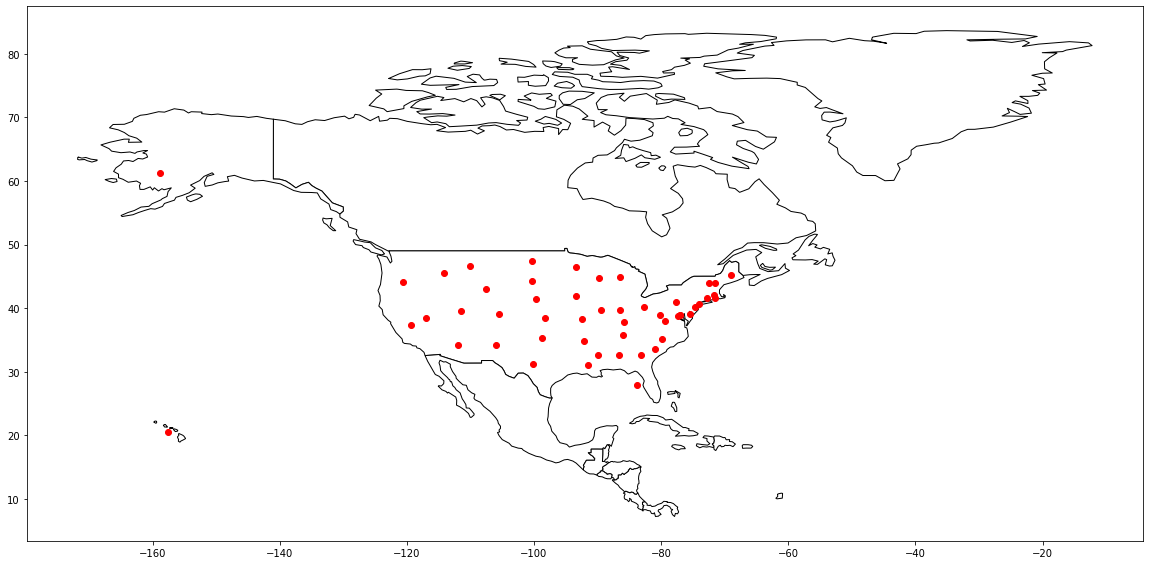

In [101]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black', figsize=(20, 20))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')


plt.show()

### Plotagem de plano cartesiano com pontos do mapa

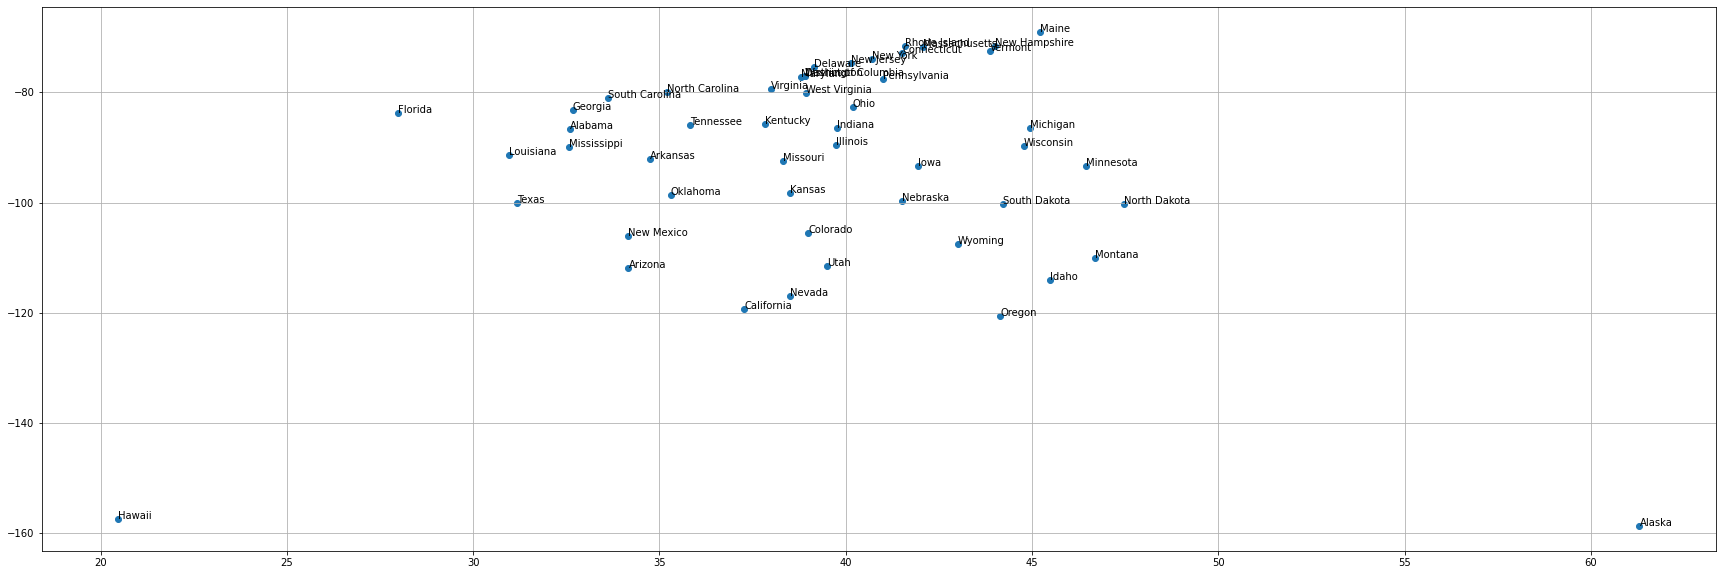

In [102]:
from matplotlib import pyplot as plt
import pandas as pd
import geopandas
import numpy as np

#fig = plt.figure(figsize=(12,12))
#ax = fig.add_subplot(111)

lat = df["Latitude"]
lng = df["Longitude"]
city = df["City"]

fig, ax = plt.subplots(figsize=(30, 10))
ax.scatter(lat, lng)

for i, txt in enumerate(city):
    ax.annotate(txt, (lat[i], lng[i]))

plt.grid()
plt.show()

### Utilização de algoritmo de Dividir e Conquistar para encontro das regiões mais próximas

In [150]:
import math 
import copy 

city1 = []
city2 = []

class Point(): 
    def __init__(self, x, y, city): 
        self.x = x 
        self.y = y
        self.city = city 
  
def dist(p1, p2): 
    return math.sqrt((p1.x - p2.x) * 
                     (p1.x - p2.x) +
                     (p1.y - p2.y) * 
                     (p1.y - p2.y))  
  
def bruteForce(P, n): 
    min_val = float('inf')  
    for i in range(n): 
        for j in range(i + 1, n): 
            if dist(P[i], P[j]) < min_val: 
                min_val = dist(P[i], P[j]) 
  
    return min_val 
  
def stripClosest(strip, size, d): 
      
    min_val = d  
  
     
    for i in range(size): 
        j = i + 1
        while j < size and (strip[j].y - 
                            strip[i].y) < min_val: 
            min_val = dist(strip[i], strip[j]) 
            city1.append(strip[i].city)
            city2.append(strip[j].city)
            j += 1
  
    return min_val  
  
def closestUtil(P, Q, n): 
      
    if n <= 3:  
        return bruteForce(P, n)  
  
    mid = n // 2
    midPoint = P[mid] 
  
    dl = closestUtil(P[:mid], Q, mid) 
    dr = closestUtil(P[mid:], Q, n - mid)  
  
    d = min(dl, dr) 
  
    strip = []  
    for i in range(n):  
        if abs(Q[i].x - midPoint.x) < d:  
            strip.append(Q[i]) 
  
    return min(d, stripClosest(strip, len(strip), d)) 
  
def closest(P, n): 
    P.sort(key = lambda point: point.x) 
    Q = copy.deepcopy(P) 
    Q.sort(key = lambda point: point.y)     
  
    return closestUtil(P, Q, n) 
  

points = []
for i in range(0, city.size):
  points.append(Point(lat[i], lng[i], city[i]))

ans = closest(points, city.size)


### Conclusão

In [151]:
print('Regiões dos estados de {} e {}'.format(city1[len(city1)-1], city2[len(city2)-1]))

Regiões dos estados de Oregon e Idaho


Conclui-se com a execução do código que a região mais propícias a ocorrência de colisões aéreas são as que ficam entre pontos no estado de Oregon e Idaho, dado a proximidade entre esses pontos e o trafego aéreo.